<h><center>
#   Hello and welcome to my presentation
# "Emission Data Analysis of state of California"<center>

## Data Intro. 
- Public data
- “mobile source emission inventory” from California Air Resources board. (https://ww2.arb.ca.gov/homepage)
- It contains data emission data from different types of vehicles in states of California.
- resolution: by , years, type of Vehicle, type of emmision, etc. 
- Goes back to year 2000 until now.
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.stats.weightstats as stm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

## Reading datas for years 2000 to 2018

In [2]:
df2000 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2000-Annual.csv', engine ='python')
df2001 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2001-Annual.csv', engine ='python')
df2002 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2002-Annual.csv', engine ='python')
df2003 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2003-Annual.csv', engine ='python')
df2004 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2004-Annual.csv', engine ='python')
df2005 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2005-Annual.csv', engine ='python')
df2006 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2006-Annual.csv', engine ='python')
df2007 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2007-Annual.csv', engine ='python')
df2008 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2008-Annual.csv', engine ='python')
df2009 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2009-Annual.csv', engine ='python')
df2010 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2010-Annual.csv', engine ='python')
df2011 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2011-Annual.csv', engine ='python')
df2012 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2012-Annual.csv', engine ='python')
df2013 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2013-Annual.csv', engine ='python')
df2014 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2014-Annual.csv', engine ='python')
df2015 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2015-Annual.csv', engine ='python')
df2016 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2016-Annual.csv', engine ='python')
df2017 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2017-Annual.csv', engine ='python')
df2018 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2018-Annual.csv', engine ='python')

In [3]:
# df2018.info()

In [4]:
# df2000.groupby(['Fuel']).size()
# df2018.groupby(['Fuel','Vehicle Category']).size()

In [5]:
# ELEC_2000_Pop_Tot=sum(df2000[df2000['Fuel']=='ELEC']['Population'])

In [6]:
#Pop_2000= dict(zip(sorted(np.array(df2000['Fuel'].unique())),np.array(df2000.groupby(['Fuel']).size())))

## Analyzing population of cars with respect to their Fuel

In [7]:
df=df2000.append([df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018])

In [8]:
Years=df['Calendar Year'].unique()
ELEC_pop=[]
for year in Years:
    ELEC_pop.append(sum(df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['Population']))
    
DSL_pop=[]
for year in Years:
    DSL_pop.append(sum(df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['Population']))
    
GAS_pop=[]
for year in Years:
    GAS_pop.append(sum(df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['Population']))
    
NG_pop=[]
for year in Years:
    NG_pop.append(sum(df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['Population']))

In [9]:
# ELEC_pop.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));

In [10]:
#print(Years)
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

findfont: Font family ['Calibri light'] not found. Falling back to DejaVu Sans.


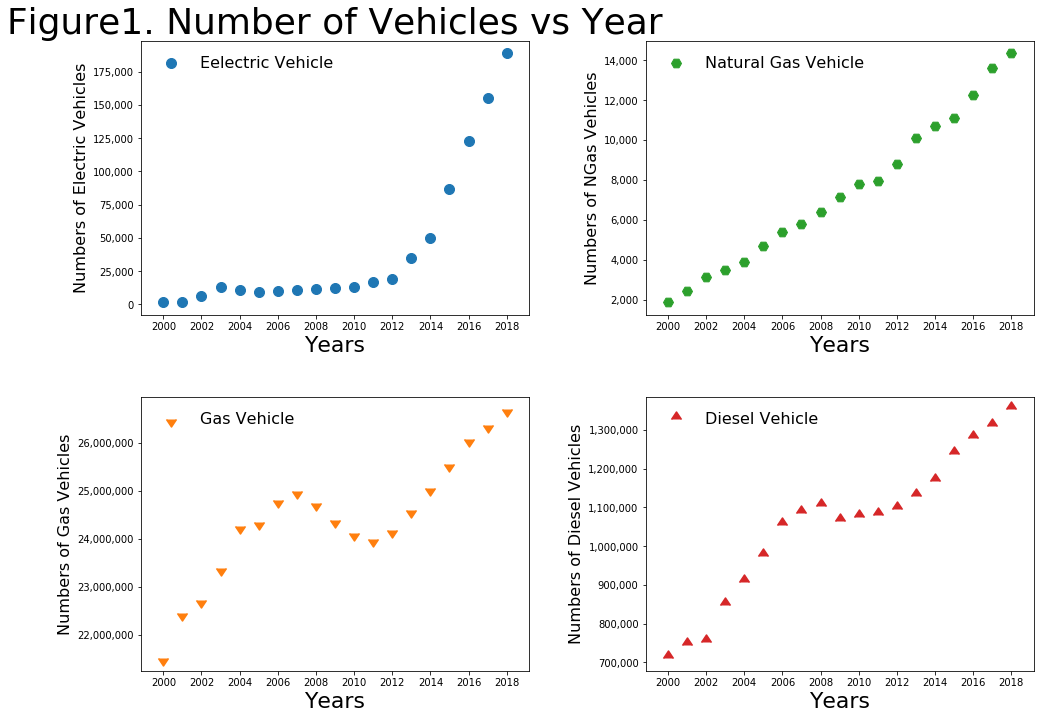

In [11]:
plt.figure(figsize=(16,10))
# plt.suptitle('Main title')

ax1=plt.subplot(2, 2, 1)
ax2=plt.scatter(Years,ELEC_pop, label='Eelectric Vehicle', marker='o', s=100) #marker=(numsides, style, angle)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=16);
plt.xticks(np.arange(2000,2019,step=2)) #, rotation=45)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)#(ax2, 'Line 1') #, 'upper left')
plt.title('Figure1. Number of Vehicles vs Year', fontname = 'Calibri light', fontsize=36)


plt.subplot(2, 2, 4, sharex=ax1)
plt.scatter(Years,DSL_pop, c='tab:Red', label='Diesel Vehicle',marker=10, s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Diesel Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplot(2, 2, 3, sharex=ax1)
plt.scatter(Years,GAS_pop, c='tab:Orange', label='Gas Vehicle',marker=11, s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Gas Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplot(2, 2, 2, sharex=ax1)
plt.scatter(Years,NG_pop, c='tab:Green', label='Natural Gas Vehicle',marker='H', s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of NGas Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplots_adjust(top=1.0, wspace=0.3, hspace=0.3) #bottom=0.75
# plt.savefig('Recession.jpg', dpi=600)


***

## California State has goal for rising the number of EVs to 1,500,000 by 2025
- **<font color=black>
Predicting numbers of EVs for 2025
</font>** <br> 

## Regression

In [12]:
X=np.array(Years).reshape(-1,1)
y=np.array(ELEC_pop).reshape(-1,1)
y_2025=np.array([2025]).reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
y_pred_1 = lr.predict(X)
y_pred_1_25 = lr.predict(y_2025)
r_squared_1 = r2_score(y, y_pred_1)
print(r_squared_1)
mse_1 = mse(y, y_pred_1)
print(mse_1)

0.6352233472106339
1081727293.261479


In [13]:
poly_reg_2 = PolynomialFeatures(degree=2)
lin_reg_2 = LinearRegression()
X_poly_2= poly_reg_2.fit_transform(X)
lin_reg_2.fit(X_poly_2,y)


poly_reg_3 = PolynomialFeatures(degree=3)
lin_reg_3 = LinearRegression()
X_poly_3= poly_reg_3.fit_transform(X)
lin_reg_3.fit(X_poly_3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
X_fit = np.arange(Years.min(), 2025, 1)[:, np.newaxis]
# print(X_fit.reshape(-1,1))

In [15]:
y_pred_2 = lin_reg_2.predict(poly_reg_2.fit_transform(X_fit.reshape(-1,1)))
xx_2=poly_reg_2.fit_transform(np.array([2025]).reshape(-1,1))
y_pred_2_25 = lin_reg_2.predict(xx_2)
r_squared_2 = r2_score(ELEC_pop, lin_reg_2.predict(X_poly_2))
mse_2 = mse(y, y_pred_2[0:19])


y_pred_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X_fit.reshape(-1,1)))
xx_3=poly_reg_3.fit_transform(np.array([2025]).reshape(-1,1))
y_pred_3_25 = lin_reg_3.predict(xx_3)
r_squared_3 = r2_score(ELEC_pop, lin_reg_3.predict(X_poly_3))
mse_3 = mse(y, y_pred_3[0:19])


R^2 score for linear = 0.64
R^2 score for quadratic = 0.92
R^2 score for cubic     = 0.99


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

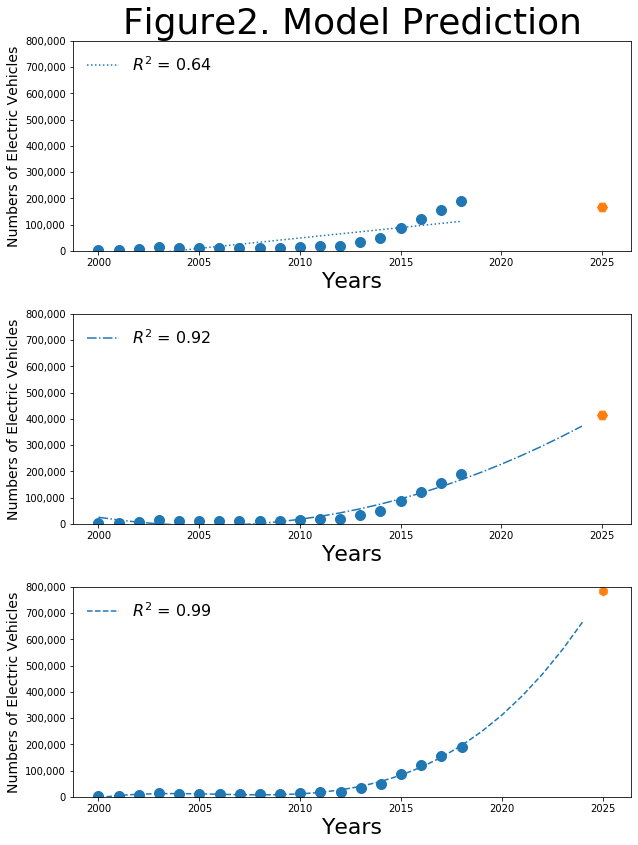

In [16]:
fig = plt.figure()
plt.figure(figsize=(10,12));

plt.subplot(3,1,1);
plt.scatter(X, y,marker='o', s=100);
plt.scatter(2025, y_pred_1_25,marker='H', s=100);
plt.plot(X, y_pred_1, linestyle=':', label="$R^2$ = {:.2f}".format(r_squared_1));
plt.ylim((0,800000))
plt.xlabel('Years',fontsize=22)
plt.ylabel('Numbers of Electric Vehicles',fontsize=14)
# plt.text(2, 5, 'mammad')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for linear = {:.2f}".format(r2_score(y, y_pred_1)))
plt.title('Figure2. Model Prediction', fontname = 'Calibri light', fontsize=36)

plt.subplot(3,1,2)
plt.scatter(Years, ELEC_pop,marker='o', s=100);
plt.scatter(np.array([2025]), y_pred_2_25,marker='H', s=100);
plt.plot(X_fit, y_pred_2, linestyle='-.', label="$R^2$ = {:.2f}".format(r_squared_2));
plt.ylim((0,800000));
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=14);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for quadratic = {:.2f}".format(r2_score(ELEC_pop, lin_reg_2.predict(X_poly_2))))


# plt.figure(figsize=(10,12));
plt.subplot(3,1,3).scatter(Years, ELEC_pop,marker='o', s=100);
plt.subplot(3,1,3).scatter(np.array([2025]), y_pred_3_25,marker='h', s=75);
plt.plot(X_fit, y_pred_3, linestyle='--', label="$R^2$ = {:.2f}".format(r_squared_3));
plt.ylim((0,800000))
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=14);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for cubic     = {:.2f}".format(r2_score(ELEC_pop, lin_reg_3.predict(X_poly_3))));
# plt.savefig('test.png', dpi=1200)
plt.subplots_adjust(top=1.00, wspace=0.5, hspace=0.3);

***
<h><center> 
# Comparing the performance of models 
<center>

findfont: Font family ['Calibri light'] not found. Falling back to DejaVu Sans.


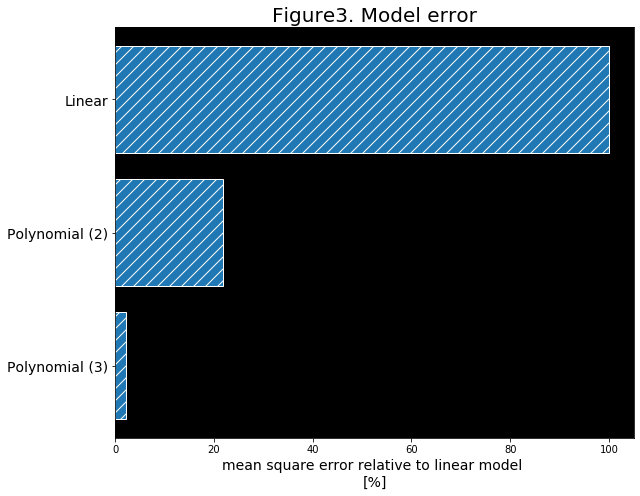

In [17]:
# Plot feature importance
feature_names = np.array(['Linear', 'Polynomial (2)','Polynomial (3)'])
feature_importance_rsquared = np.array([r_squared_1, r_squared_2, r_squared_3])
feature_importance_mse = np.array([mse_1, mse_2, mse_3])

# make importances relative to max importance
plt.figure(figsize=(9,7));
feature_importance_mse = 100.0 * ((feature_importance_mse / feature_importance_mse.max()))
sorted_idx = np.argsort(feature_importance_mse)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_mse[sorted_idx], align='center', edgecolor='white', hatch="//")
plt.yticks(pos, feature_names[sorted_idx],fontsize=14)
plt.xlabel('mean square error relative to linear model \n[%]', fontsize=14)
plt.title('Figure3. Model error', fontname = 'Calibri light', fontsize=20)
haha=plt.gca()
haha.set_facecolor('xkcd:black')
plt.tight_layout()
# plt.savefig('ModelError.jpg')
plt.show()


In [18]:
print(feature_importance_mse)

[100.          21.79642217   2.11081066]


*** 
## Ratio Emission per Vehicle

In [19]:
Years=df['Calendar Year'].unique()
Emission_year=[]
Emission_ELEC=[]
Emission_DSL=[]
Emission_GAS=[]
Emission_NG=[]
for year in Years:
    Emission_year.append( (sum(df[(df['Calendar Year']==year)]['CO2_TOTEX'])) /
                         (sum(df[df['Calendar Year']==year]['Population'])) )

for year in Years:
    Emission_DSL.append(  sum(   df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['Population'])  )

for year in Years:
    Emission_GAS.append(  sum(   df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['Population'])  )
for year in Years:
    Emission_NG.append(  sum(   df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['Population'])  )

for year in Years:
    Emission_ELEC.append(  sum(   df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['Population'])  )
    
    

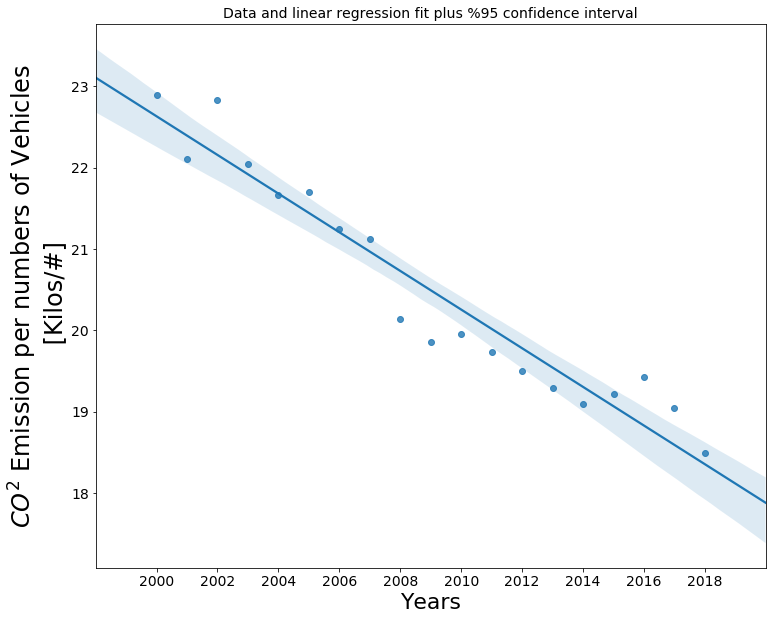

<Figure size 432x288 with 0 Axes>

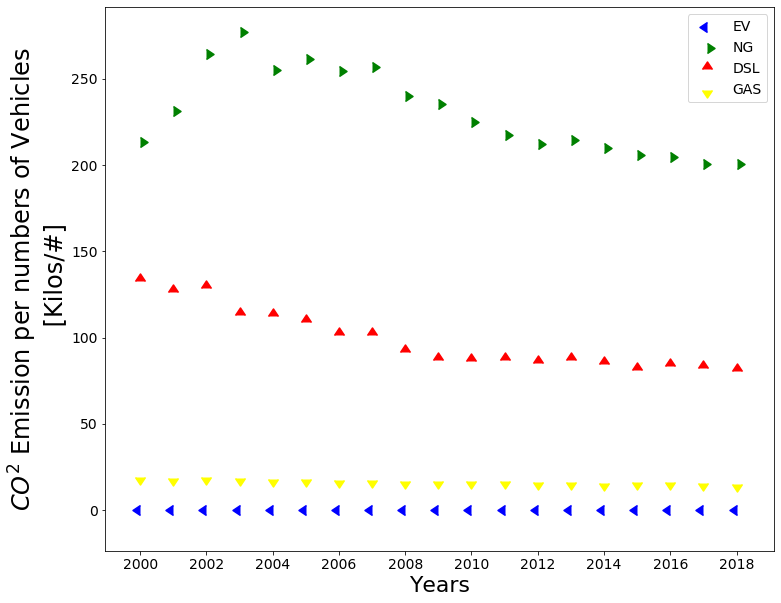

In [20]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12, 10))    

# plt.figure(figsize=(12,10))
# plt.subplot(2, 2, 1)
#plt.subplot(2,1,1)
#plt.scatter(Years,Emission_year, c='Black')
sns.regplot(Years,Emission_year)#, x_estimator=np.mean)
plt.xticks(np.arange(2000,2019,step=2), fontsize=14) #, rotation=45)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1000))
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.yticks(fontsize=14)
plt.title('Data and linear regression fit plus %95 confidence interval', fontsize=14)


plt.xlabel('Years',fontsize=22)
plt.ylabel('$CO^2$ Emission per numbers of Vehicles\n [Kilos/#]',fontsize=24)
# xlabels = ['{:,.0f}'.format(x)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter())

plt.show()

# plt.xlim((2000,2020))
# plt.subplot(2,1,2)
fig = plt.figure()
plt.figure(figsize=(12,10));

plt.scatter(Years,Emission_ELEC, c='Blue', label = 'EV',marker=8, s=100)
plt.scatter(Years,Emission_NG, c='Green', label = 'NG',marker=9, s=100)
plt.scatter(Years,Emission_DSL, c='Red', label = 'DSL',marker=10, s=100)
plt.scatter(Years,Emission_GAS, c='Yellow', label = 'GAS',marker=11, s=100)

plt.xlabel('Years',fontsize=22)
plt.xticks(np.arange(2000,2019,step=2), fontsize=14)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1000))
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.yticks(fontsize=14)
plt.ylabel('$CO^2$ Emission per numbers of Vehicles\n [Kilos/#]',fontsize=24)
plt.yscale
plt.legend(fontsize=14,loc = 'upper right')

***
<h><center>
## Summary and Future Works <center>

- __~%98__ improvmenet relative to base model (linear regression) was achieved
- __Data visualization__ on the California map
- Interactive emission and type of vehicle Data on map versus time
- Studying the effect of  __Neural Netwrok__ for imporiving the model


- Fun fact: Can you locate the recession on the data?

<img src="MSE.jpg" alt="drawing" width="600"/>

### Future work

![title](Cali_DataViz_Example.jpg)
### Fun fact: Can you locate the recession on the data?
<img src="Rec.jpg" alt="drawing" width="800"/>

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(Years).reshape(-1,1), np.array(ELEC_pop).reshape(-1,1), test_size = 0.08, random_state = 0)

In [22]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [23]:
# # Initialising the ANN
# model = Sequential()

# # Adding the input layer and the first hidden layer
# model.add(Dense(32, activation = 'relu', input_dim = 1))

# # Adding the second hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the third hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the output layer
# model.add(Dense(units = 1))

In [24]:
# # Compiling the ANN
# model.compile(optimizer = 'adam',loss = 'mean_squared_error', metric='mse')

# # Fitting the ANN to the Training set
# model.fit(X_train, y_train, batch_size = 1 , epochs = 100, verbose=0)

In [25]:
# y_pred = model.predict(X_test)

In [26]:
# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

In [27]:
# model2 = LinearRegression()

In [28]:
# model2.fit(X_train, y_train)

In [29]:
# result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
# np.abs(result).sort_values(by='coefficient', ascending=False)

In [30]:
# y_pred = model.predict(X_test)

In [31]:
# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()